In [1]:
#导入包
from numpy import *
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import scipy

In [2]:
#获取数据
def get_data(fileName):
    data = load_svmlight_file(fileName)
    return data[0],data[1]
X,Y = get_data("housing_scale.txt")

In [3]:
print(X.shape,Y.shape)

(506, 13) (506,)


In [4]:
#切分数据
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33, random_state=42)

In [5]:
print(X_train.shape,X_test.shape)

(339, 13) (167, 13)


In [6]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [14]:
#损失函数
def loss(y,label,weights):
    m = y.shape[0]
    delta = 100
    #测试过正则化
    return sum(power(y - label,2))/(2 * m)# + delta * sum(power(weights[1:],2))/(2 * m)

In [41]:
#梯度下降
def grad_des(X,label,X_test,Y_test,alpha=0.02, max_iter_count=1000):
    ''''
    alpha是学习率
    ''''
    labelMat = label.T
    print(X.shape)
    m,n = X.shape  #(339, 13)
    #一开始竟然漏了BIAS=_= ，查了N久=_=
    x = scipy.sparse.csr.csr_matrix(ones((m,n+1)))
    print(x.shape)
    x[:,1:n+1] = X
    #print(x[:,:n].shape)
    X = x
    print(X.shape)
    x = scipy.sparse.csr.csr_matrix(ones((X_test.shape[0],n+1)))
    x[:,1:n+1] = X_test
    X_test = x
    
    delta = 100
    
    weights = zeros(n+1)
    iter_list=[]  
    loss_train_list=[]
    loss_test_list=[]
    y = X * weights # shape(339,0)
    #要给出画出随迭代次数的变化图的数据
    for k in range(max_iter_count):
        #weights[1:] = delta * weights[1:]
        #测试过正则化
        grad = (y-label) *X  /m  #+delta * sum(norm(weights[1:]))/m
        #更新梯度
        weights = weights - (alpha * grad)
        
        y = X * weights # shape(339,0)
        y_test = X_test * weights
        #计算损失
        loss_train= loss(y,label,weights)
        loss_test = loss(y_test , Y_test,weights)
        iter_list.append(k)
        loss_train_list.append(loss_train)
        loss_test_list.append(loss_test)
    return weights,iter_list,loss_train_list,loss_test_list

In [55]:
weights,iter_list,loss_train_list,loss_test_list= grad_des(X_train,y_train, 
                                                           X_test,y_test,0.05,2000)


(339, 13)
(339, 14)
(339, 14)


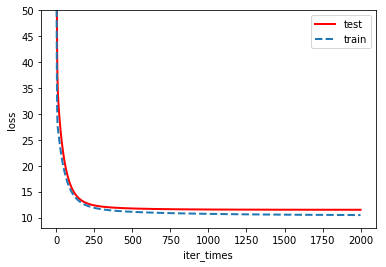

10.47726570351133

In [64]:
plt.figure()
plt.plot(iter_list,loss_train_list,color = 'red',linewidth = 2.0,label = 'test')
plt.plot(iter_list,loss_test_list,linestyle = '--',linewidth = 2.0,label = 'train' )
plt.xlabel('iter_times')  
plt.ylabel('loss') 
plt.ylim((8, 50))
plt.legend()
plt.show()

10.364229694102526